In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

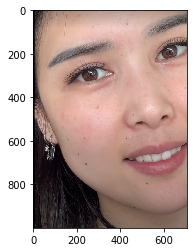

In [2]:
img = cv2.imread('week1_homework.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

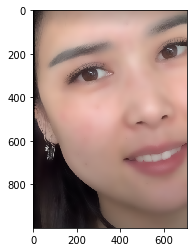

In [3]:
# 使用中值滤波进行简单美颜
dst = cv2.bilateralFilter(img, 0, 100, 13)
plt.imshow(dst)

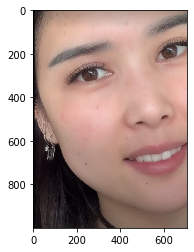

In [4]:
# 高斯滤波
patch_new=cv2.GaussianBlur(dst,(5,5),0)
blurred = np.minimum(0.5*patch_new+(1-0.5)*img,255).astype('uint8')
plt.imshow(blurred)

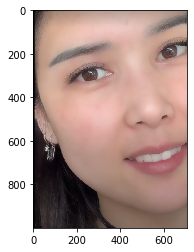

In [5]:
import numpy.matlib

def Sur_blur (I_in, thre=20, half_size=10):
    #表面模糊Surface Blur
    #references：https://blog.csdn.net/shinian1987/article/details/78345408

    I_out = np.array(I_in, np.float32)
    row, col,channel = I_in.shape
    w_size = half_size * 2 + 1
    for kk in range(channel):
        I_in_tmp = I_in[:,:,kk]
        I_out_tmp = I_out[:,:,kk]

        for ii in range (half_size, row-1-half_size):
            for jj in range (half_size, col-1-half_size):
                aa = I_in_tmp [ii-half_size:ii+half_size+1, jj-half_size : jj+half_size+1]
                p0 = I_in_tmp [ii, jj]
                mask_1 = numpy.matlib.repmat(p0, w_size, w_size)
                mask_2 = 1-abs(aa-mask_1)/(2.5*thre);
                mask_3 = mask_2 * (mask_2 > 0)
                t1 = aa * mask_3
                I_out_tmp[ii, jj] = t1.sum()/mask_3.sum()

        I_out[:,:,kk]=I_out_tmp
    return np.asarray(I_out,np.uint8)

sur_img = Sur_blur(blurred)
plt.imshow(sur_img)

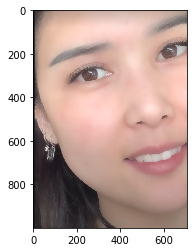

In [8]:
def beauty_face(img):
        #https://www.icode9.com/content-1-608228.html
        #Dest =(Src * (100 - Opacity) + (Src + 2 * GuassBlur(EPFFilter(Src) - Src + 128) - 256) * Opacity) /100 ;
        #https://my.oschina.net/wujux/blog/1563461
        
        
        dst = np.zeros_like(img)
        #int value1 = 3, value2 = 1; 磨皮程度与细节程度的确定
        v1 = 3
        v2 = 1
        dx = v1 * 5 # 双边滤波参数之一 
        fc = v1 * 12.5 # 双边滤波参数之一 
        p = 0.1
   
        temp4 = np.zeros_like(img)
        
        temp1 = cv2.bilateralFilter(img,dx,fc,fc)
        temp2 = cv2.subtract(temp1,img)
        temp2 = cv2.add(temp2,(10,10,10,128))
        temp3 = cv2.GaussianBlur(temp2,(2*v2 - 1,2*v2-1),0)
        temp4 = cv2.add(img,temp3)
        dst = cv2.addWeighted(img,p,temp4,1-p,0.0)
        dst = cv2.add(dst,(10, 10, 10,255))
        return dst

beauty_01 = beauty_face(sur_img)
plt.imshow(beauty_01)

In [9]:
# 保存图片
cv2.imwrite('./beauty-face.png',beauty_01)

True

True

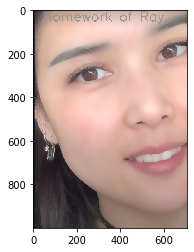

In [10]:
img = cv2.imread("./beauty-face.png")
font = cv2.FONT_HERSHEY_SIMPLEX  # 字体类型: 正常大小无衬线字体
# 参数分别是图片, 输入文本数据，放置文本的位置坐标，字体类型，字体大小，颜色为白色，厚度为2
cv2.putText(img, 'homework of Ray', (50, 50), font, 2, (150, 150, 150), 3)
# 保存添加文字后的图片
plt.imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite("./homework_ray.png", img)